# SMAI Assignment-5, Q-2, HMM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

## 3.4 Task-3

### 3.4.2 Part 1 (20)


1. Train an HMM model with a 50 % train and validation split (Split it
sequentially, that is the first 50 % rolls should be on the train set and rest
in validation. Experiment with different emission probabilities for the
loaded die and report the model with the best score. Use the validation
split to evaluate the best model

In [2]:
# Load data
data = np.load('rolls.npy')
num_rolls = len(data)
train_size = num_rolls // 2

# Split data into train and validation sets
train_data = data[:train_size].reshape(-1, 1) 
validation_data = data[train_size:].reshape(-1, 1)

In [51]:
np.random.seed(13)
best_score = float('-inf')
best_model = None
best_emission_loaded_probs = []
emission_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in range(1,7):
    for emission_prob in emission_probs:
        model = hmm.CategoricalHMM(n_components=2, n_iter=10, random_state=13, init_params='t')  #fair and loaded dies
        model.startprob_ = np.array([1.0, 0.0])   #start from fair
        pr_l = (1-emission_prob)/5
        loaded_prob = []
        for j in range(6):
            if j==i-1:
                loaded_prob.append(emission_prob)
            else:
                loaded_prob.append(pr_l)

        model.emissionprob_ = np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],loaded_prob])
        model.fit(train_data.reshape(-1, 1))
        score = model.score(validation_data.reshape(-1, 1))
        # print("score:",score)
        if score > best_score:
            best_score = score
            best_model = model
            best_emission_loaded_probs = best_model.emissionprob_[1,:]
            # loaded_dies_index = i
print("Best Model Score:",best_score)
print("\n")
print("Best Model Transmission Matrix:\n",best_model.transmat_)
print("\n")
print("Emission Probability for Best Model Score of the Loaded state:\n",best_emission_loaded_probs)
print("\nLoaded dies number:",np.argmax(best_emission_loaded_probs)+1)

Best Model Score: -43099.5968379939


Best Model Transmission Matrix:
 [[0.69091688 0.30908312]
 [0.54828826 0.45171174]]


Emission Probability for Best Model Score of the Loaded state:
 [0.04915447 0.04995925 0.04814033 0.04912401 0.04958487 0.75403707]

Loaded dies number: 6


2. Find the most likely sequence of switching between the fair and loaded
die. 
3. Plot the generated states

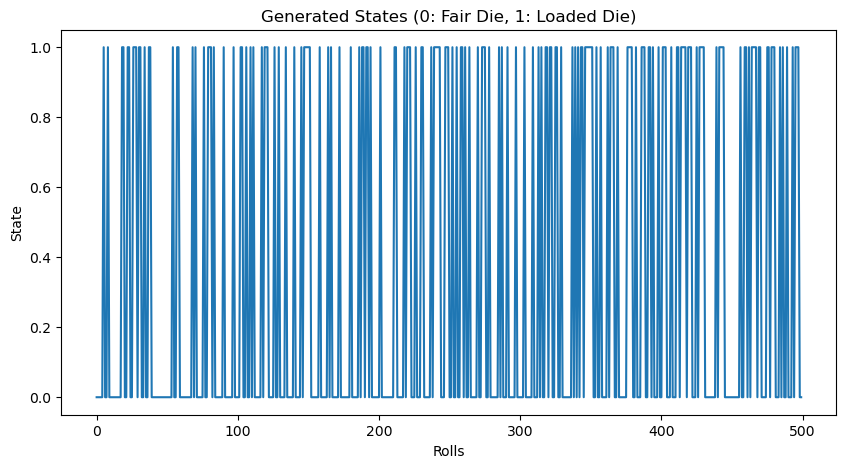

In [52]:
sequence = best_model.predict(data.reshape(-1, 1))
plt.figure(figsize=(10, 5))
plt.plot(sequence[:500])
plt.title('Generated States (0: Fair Die, 1: Loaded Die)')
plt.xlabel('Rolls')
plt.ylabel('State')
plt.show()

4. What problem in Hidden Markov Models does this task correspond to?


*  The task of finding the most likely sequence of switching between the fair and loaded die corresponds to the "decoding" problem in Hidden Markov Models. 
* The Viterbi algorithm is used to solve this problem.

### 3.4.3 Part 2 (20)


1. How often do you think the casino is switching out the fair die for the
loaded one and vice versa?


In [53]:
switch_count = np.sum(np.diff(sequence) != 0)
print("Switching Count:",switch_count)
# Calculate the frequency of switching
switching_frequency = switch_count / len(sequence)
print("Switching Frequency:",switching_frequency*100,"%")

Switching Count: 19795
Switching Frequency: 39.589999999999996 %


2. What problem in Hidden Markov Models does this task correspond to?

* The task of determining how often the casino is switching out the fair die for the loaded one and vice versa corresponds to the "learning" problem in Hidden Markov Models.
* It means determining the transition probabilities between states (fair die and loaded die) to understand how frequently the casino is switching between them.


### 3.4.4 Part 3 (20)

1. How do you think the loaded die is biased

* The bias in the loaded die is introduced through the emission probabilities in the Hidden Markov Model. 
* In the context of this investigation, the loaded die is assumed to have biased probabilities for each face compared to a fair die. 
* Specifically, when defining the emission probabilities for the loaded die, you might experiment with different values for these probabilities.  

* pr_l = (1-emission_prob)/5
* model.emissionprob_ = np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6], 
                                 [pr_l, pr_l, pr_l, pr_l, pr_l,emission_prob]])   
                                 
* Here, emission_prob is a parameter that controls the bias in the loaded die. The higher the value of emission_prob, the more biased the loaded die becomes towards a specific face (here in case of 6).

In [54]:
print("Emission Matrix of Best Model:\n",best_model.emissionprob_)

Emission Matrix of Best Model:
 [[0.18807996 0.18668812 0.18921453 0.18547016 0.19083961 0.05970762]
 [0.04915447 0.04995925 0.04814033 0.04912401 0.04958487 0.75403707]]


2. What problem in Hidden Markov Models does this task correspond to?

* The task of understanding how the loaded die is biased corresponds to the "evaluation" problem in Hidden Markov Models.
*  It means assessing how well the HMM model explains the observed data, particularly in terms of the biases in the loaded die. 

## 3.5 Task-4 : (30)

1. Find the optimal transition, emission and start probability for the HMM
model.
2. Choosing the best HMM based on the data, and the model information
can you predict who played the first and the last ball?


In [64]:
runs = np.load('runs.npy')
np.random.seed(13)

model = hmm.CategoricalHMM(n_components=2, n_iter=100, random_state=42, init_params = 's')
model.n_features = 7

model.transmat_ = np.array([[0.7,0.3],[0.3, 0.7]]) #based on given data

virat_emissionprob = [0.1,0.3,0.3,0.1,0.1,0,0.1] #virat take singles and doubles
rohit_emissionprob = [0.1,0.1,0.1,0.1,0.3,0,0.3] #rohit take risky shots
model.emissionprob_ = np.array([virat_emissionprob,rohit_emissionprob])

model.fit(runs)
states = model.predict(runs)
first_player = "Virat" if states[0]==0 else "Rohit"
last_player = "Virat" if states[-1]==0 else "Rohit"
print("The first ball is played by:",first_player)
print("The last ball is played by:",last_player)

The first ball is played by: Virat
The last ball is played by: Rohit


In [65]:
print("The Optimal Emission Probability:\n ",model.emissionprob_)
print("\nThe Optimal Transition Probability:\n ",model.transmat_)
print("\nThe Optimal Start Probability:\n ",model.startprob_)

The Optimal Emission Probability:
  [[0.15743395 0.31220425 0.26068106 0.04457107 0.1316838  0.
  0.09342587]
 [0.09695387 0.10177476 0.1031829  0.05127569 0.36145892 0.
  0.28535386]]

The Optimal Transition Probability:
  [[0.66833047 0.33166953]
 [0.29253819 0.70746181]]

The Optimal Start Probability:
  [1.00000000e+00 6.20749571e-12]
